# 5-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자
---

## **목차**

Step 1.[사진 모으기](#Step-1.-사진-모으기)  
Step 2.[얼굴 영역 자르기](#Step-2.-얼굴-영역-자르기)  
Step 3.[얼굴 영역의 임베딩 추출하기](#Step-3.-얼굴-영역의-임베딩-추출하기)  
Step 4.[모은 연예인들과 비교하기](#Step-4.-모은-연예인들과-비교하기)  
Step 5.[다양한 재미있는 시각화 시도해 보기](#Step-5.-다양한-재미있는-시각화-시도해-보기)  
Step 6.[회고 및 마무리](#Step-6.-회고-및-마무리)  

---

## Step 1. 사진 모으기

**1. 내 사진 찍기**  
- 내 사진을 2장 이상 포함합시다.
- 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다.
- 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
- 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다. 

**2. 비교할 연예인 사진 모으기**  
- 스터디를 함께 진행하는 김성연님, 안가영님이 찾아주신 연예인 이미지와 본인이 모은 연예인 & 캐릭터 사진 (총 129장)으로 이번 프로젝트를 진행하였습니다.

## Step 2. 얼굴 영역 자르기

In [1]:
# 필요한 모듈 불러오기
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
from PIL import Image
import glob
import numpy as np
import pandas as pd

In [2]:
# 이미지 파일 불러오기

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset'
file_list = os.listdir(dir_path)

print('연예인 & 캐릭터 이미지 파일 갯수:', len(file_list) - 5) # 추가한 내 사진 수를 뺀 나머지 사진 수 세기

연예인 & 캐릭터 이미지 파일 갯수: 129


In [3]:
# 이미지 파일 리스트 확인

print ("파일 리스트:\n{}".format(file_list))

파일 리스트:
['소진.jpg', '로제.jpg', '차은우.png', '류승범.jpg', '안재홍.jfif', '김재환.jpg', '공명.jpeg', '박민영.png', '박신혜.png', '박진영.jpg', '.ipynb_checkpoints', '김연아.jfif', '서인국.jpg', '너에게닿기를_카제하야.png', '슬기.png', '채영.jpg', '강다니엘.png', '시우민.jpg', '강혜원.png', '츄.png', '고윤정.png', '공효진.jfif', '박명수.jpg', '너에게닿기를_사와코.png', '노제.png', '한소희.png', '보라.png', '채수빈.png', '김우빈.png', '강개리.jfif', '하하.jpg', '고민시.jpg', '아이유.png', '아린2.png', '안은진.jfif', '채영.png', '아이린.jfif', '강봉성.jpg', '너에게닿기를_쿠루미.png', '박지훈.jpg', '류혜영.jfif', '서현진.jpg', '바바라팔빈.png', '박보영.jpg', '마동석.jpg', '서은수.png', '강민경.jpg', '보노보노.jfif', '소주연.jpg', '귀멸의칼날_탄지로.png', '효연.jpg', '문근영.png', '박소담.png', '신민아.png', '수호.jpg', '한지은.jpg', '김보라.jpg', '승희.jpg', '한혜리.png', '귀멸의칼날_네즈코.png', '김다미.png', '문가영.png', '츄.jfif', '공정환.jpg', 'selfimg4.jpg', '라푼젤.png', '손예진.jpg', '송지효.jpg', '나연.png', '김동률.jpg', '태연.jpg', '미미.jpg', 'selfimg5.jpg', '김대명.jpg', '김래원.jpg', 'selfimg1.jpg', '진서연.png', '배진영.jpg', '박나래.jpg', '백현.jpg', '지호.jpg', '비니.png', '서현.png', '로제.png', '류준열.jpg', '아린.pn

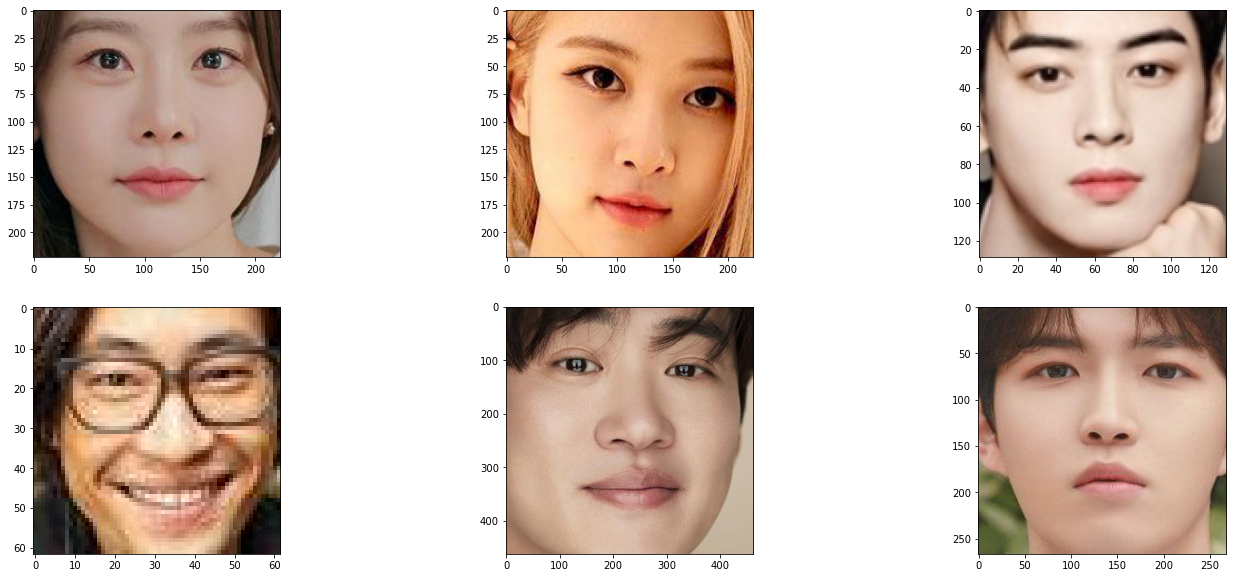

In [4]:
# 이미지 파일 일부 확인

# Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

In [5]:
# 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라주는 함수

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

[(139, 366, 325, 180)]


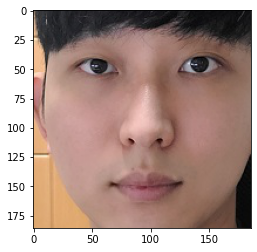

In [6]:
# 얼굴 영역이 정확히 탐지 되었는 지 확인

image_path = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/selfimg1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

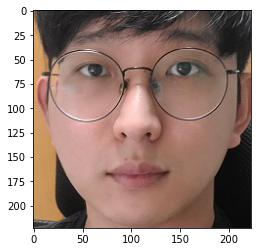

In [7]:
# 안경을 쓴 사진 출력
image_path = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/selfimg5.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## Step 3. 얼굴 영역의 임베딩 추출하기

In [8]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [9]:
# 파일 경로를 넣으면 embedding_dict를 리턴하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try: 
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                #  embedding_dict[] 이미지 파일의 임베딩을 구해 담음 키=사람이름, 값=임베딩 벡터
                #  os.path.splitext(file)[0] 파일의 확장자를 제거한 이름만 추출
                #  embedding[0]은 넣고 싶은 요소값

        except:
            continue
            
    return embedding_dict

In [10]:
embedding_dict = get_face_embedding_dict(dir_path)

## Step 4. 모은 연예인들과 비교하기

In [11]:
# 이미지 간의 embedding 벡터의 거리를 구하는 함수 정의

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [12]:
# 본인 사진의 거리를 확인해보자 (배경이 다른 이미지 간의 비교)

print('내 사진끼리의 거리는?:', get_distance('selfimg1', 'selfimg4'))

내 사진끼리의 거리는?: 0.2703252199749393


In [13]:
# 본인 사진의 거리를 확인해보자 (안경을 쓴 이미지와 쓰지 않은 이미지 간의 비교)

print('내 사진끼리의 거리는?:', get_distance('selfimg1', 'selfimg5'))

내 사진끼리의 거리는?: 0.3433946722786376


### 본인 사진의 거리를 통한 통찰 (배경이 다른 이미지 간의 비교 & 안경을 쓴 이미지와 쓰지 않은 이미지 간의 비교)

배경이 다른 이미지 간의 임베딩 벡터의 거리 값 (0.2703252199749393)보다

안경을 쓴 이미지와 쓰지 않은 이미지 간의 임베딩 벡터의 거리 값 (0.3433946722786376)이 더 크다는 것을 확인 할 수 있었습니다.

이를 통해서 배경이 다른 이미지에 따라 어떤 닮은 연예인이 나오는 지와

안경을 쓴 이미지에서 어떤 닮은 연예인이 나오는 지를 비교해서 확인해 보도록 하겠습니다

In [14]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [15]:
# 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트 출력하는 함수

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    rank_cnt = 1 # 순위를 세는 변수
    pass_cnt = 1 # 건너뛴 숫자를 세는 변수(본인 사진 카운트)
    end = 0      # 닮은 꼴 5번 출력시 종료하기 위해 세는 변수
    for i in range(top+15):
        rank_cnt += 1
        if sorted_faces[i][0].find('selfimg') == 0:  # 본인 사진인 mypicture라는 파일명으로 시작하는 경우 제외합니다.
            pass_cnt += 1
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(rank_cnt - pass_cnt, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            end += 1
        if end == 5: # end가 10가 된 경우 연예인 5명 출력되었기에 종료합니다.
            break

In [16]:
# selfimg1와 가장 닮은 사람은 누굴까요?

get_nearest_face('selfimg1')

순위 1 : 이름(류혜영), 거리(0.3493227485689285)
순위 2 : 이름(남궁민), 거리(0.39119452528562537)
순위 3 : 이름(류준열), 거리(0.3944169864861926)
순위 4 : 이름(황민현), 거리(0.39618732220958924)
순위 5 : 이름(백현), 거리(0.3963967128389834)


In [17]:
# selfimg2와 가장 닮은 사람은 누굴까요?

get_nearest_face('selfimg2')

순위 1 : 이름(류혜영), 거리(0.3606350563210488)
순위 2 : 이름(김동완), 거리(0.3853138725723159)
순위 3 : 이름(서현진), 거리(0.3934634057355964)
순위 4 : 이름(황민현), 거리(0.3972817040179214)
순위 5 : 이름(김다미), 거리(0.399050084004917)


In [18]:
# selfimg3와 가장 닮은 사람은 누굴까요?

get_nearest_face('selfimg3')

순위 1 : 이름(서현진), 거리(0.3784110358307603)
순위 2 : 이름(류혜영), 거리(0.3795812584934046)
순위 3 : 이름(소진), 거리(0.4260880217945656)
순위 4 : 이름(남궁민), 거리(0.4273296189193157)
순위 5 : 이름(아린2), 거리(0.428148069050254)


In [19]:
# selfimg1와 가장 닮은 사람은 누굴까요?

get_nearest_face('selfimg4')

순위 1 : 이름(황민현), 거리(0.3827676253461797)
순위 2 : 이름(류혜영), 거리(0.3906738274572179)
순위 3 : 이름(남궁민), 거리(0.3985395954878331)
순위 4 : 이름(황정음), 거리(0.40456272273832145)
순위 5 : 이름(김다미), 거리(0.41216707117510537)


In [20]:
# selfimg1와 가장 닮은 사람은 누굴까요?

get_nearest_face('selfimg5')

순위 1 : 이름(손예진), 거리(0.4183885807222977)
순위 2 : 이름(디오), 거리(0.42102093363601084)
순위 3 : 이름(김다미), 거리(0.42310112368232894)
순위 4 : 이름(박민영), 거리(0.42520007107590563)
순위 5 : 이름(박형식), 거리(0.4380638753987138)


## Step 5. 다양한 재미있는 시각화 시도해 보기

### 5.1. Top 5 이미지 출력

In [21]:
# 사진 경로 설정

# 본인의 사진
selfimg1 = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/selfimg1.jpg'
selfimg2 = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/selfimg2.jpg'
selfimg3 = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/selfimg3.jpg'
selfimg4 = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/selfimg4.jpg'
selfimg5 = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/selfimg5.jpg'

# 닮은 연예인 사진
HyeYoung = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/류혜영.jfif'
koongMin = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/남궁민.jpg'
JunYeol = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/류준열.jpg'
MinHyun = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/황민현.jpg'
BaekHyun = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/백현.jpg'

DongWan = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/김동완.jpg'
HyunJin = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/서현진.png'
DaMi = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/김다미.png'
SoJin = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/소진.jpg'
Arin = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/아린2.png'

YeJin = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/손예진.jpg'
DO = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/디오.jpg'
MinYoung = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/박민영.png'
HoungSik = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/박형식.jpg'
JungEum = os.getenv('HOME')+'/aiffel/face_embedding/Exp05_dataset/황정음.jpg'

In [22]:
# 크롭한 얼굴을 저장해 보자

a1 = get_cropped_face(selfimg1)
a2 = get_cropped_face(selfimg2)
a3 = get_cropped_face(selfimg3)
a4 = get_cropped_face(selfimg4)
a5 = get_cropped_face(selfimg5)

b1 = get_cropped_face(HyeYoung)
b2 = get_cropped_face(koongMin)
b3 = get_cropped_face(JunYeol)
b4 = get_cropped_face(MinHyun)
b5 = get_cropped_face(BaekHyun)

b6 = get_cropped_face(DongWan)
b7 = get_cropped_face(HyunJin)
b8 = get_cropped_face(DaMi)
b9 = get_cropped_face(SoJin)
b10 = get_cropped_face(Arin)

b11 = get_cropped_face(YeJin)
b12 = get_cropped_face(DO)
b13 = get_cropped_face(MinYoung)
b14 = get_cropped_face(HoungSik)
b15 = get_cropped_face(JungEum)

selfimg1의 순위
순위 1 : 이름(류혜영), 거리(0.3493227485689285)
순위 2 : 이름(남궁민), 거리(0.39119452528562537)
순위 3 : 이름(류준열), 거리(0.3944169864861926)
순위 4 : 이름(황민현), 거리(0.39618732220958924)
순위 5 : 이름(백현), 거리(0.3963967128389834)


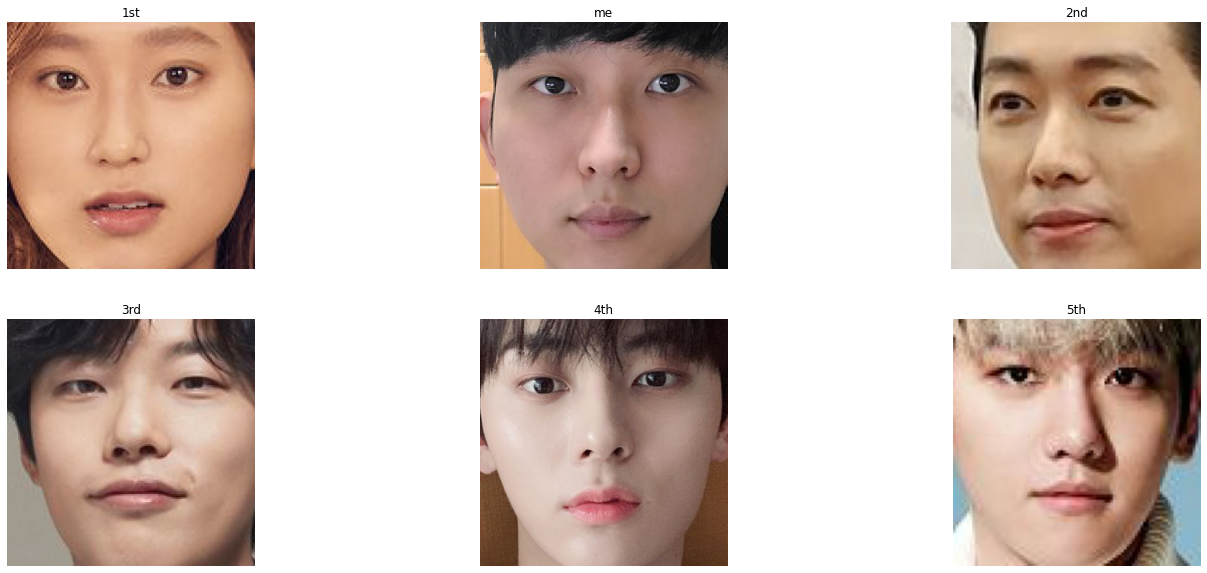

In [23]:
plt.figure(figsize=(24,10))

plt.subplot(231)
plt.imshow(b1)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a1)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b2)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)
plt.imshow(b3)
plt.axis('off')
plt.title('3rd')
plt.subplot(235)
plt.imshow(b4)
plt.axis('off')
plt.title('4th')
plt.subplot(236)
plt.imshow(b5)
plt.axis('off')
plt.title('5th')

print('''selfimg1의 순위
순위 1 : 이름(류혜영), 거리(0.3493227485689285)
순위 2 : 이름(남궁민), 거리(0.39119452528562537)
순위 3 : 이름(류준열), 거리(0.3944169864861926)
순위 4 : 이름(황민현), 거리(0.39618732220958924)
순위 5 : 이름(백현), 거리(0.3963967128389834)''')

selfimg2의 순위
순위 1 : 이름(류혜영), 거리(0.3606350563210488)
순위 2 : 이름(김동완), 거리(0.3853138725723159)
순위 3 : 이름(서현진), 거리(0.3934634057355964)
순위 4 : 이름(황민현), 거리(0.3972817040179214)
순위 5 : 이름(김다미), 거리(0.399050084004917)


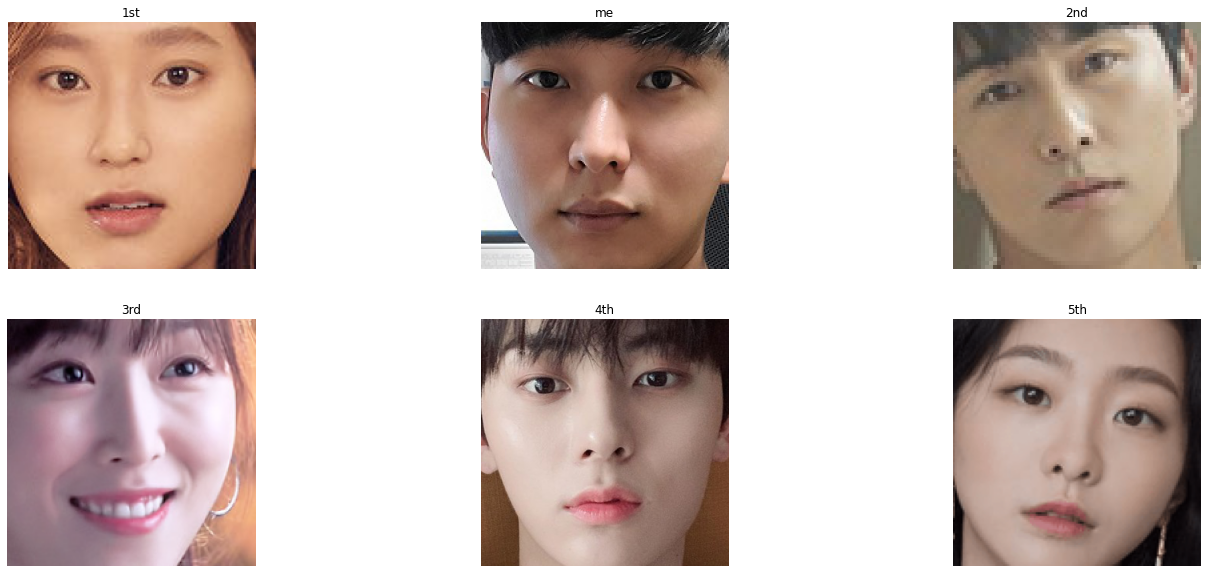

In [24]:
plt.figure(figsize=(24,10))

plt.subplot(231)
plt.imshow(b1)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a2)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b6)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)
plt.imshow(b7)
plt.axis('off')
plt.title('3rd')
plt.subplot(235)
plt.imshow(b4)
plt.axis('off')
plt.title('4th')
plt.subplot(236)
plt.imshow(b8)
plt.axis('off')
plt.title('5th')

print('''selfimg2의 순위
순위 1 : 이름(류혜영), 거리(0.3606350563210488)
순위 2 : 이름(김동완), 거리(0.3853138725723159)
순위 3 : 이름(서현진), 거리(0.3934634057355964)
순위 4 : 이름(황민현), 거리(0.3972817040179214)
순위 5 : 이름(김다미), 거리(0.399050084004917)''')

selfimg3의 순위
순위 1 : 이름(서현진), 거리(0.3784110358307603)
순위 2 : 이름(류혜영), 거리(0.3795812584934046)
순위 3 : 이름(소진), 거리(0.4260880217945656)
순위 4 : 이름(남궁민), 거리(0.4273296189193157)
순위 5 : 이름(아린2), 거리(0.428148069050254)


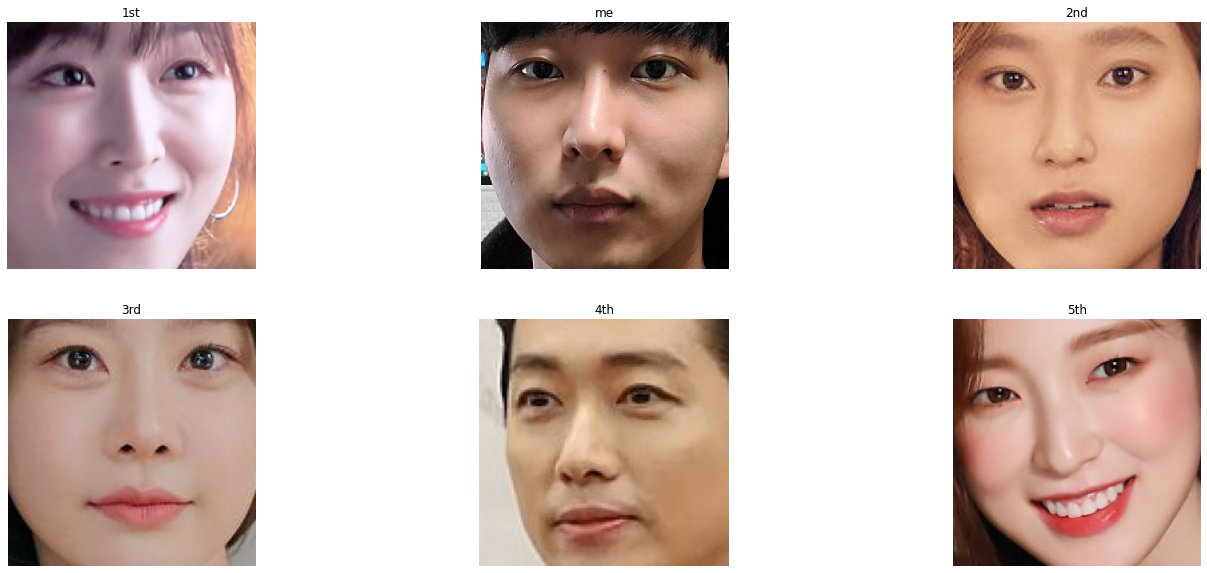

In [25]:
plt.figure(figsize=(24,10))

plt.subplot(231)
plt.imshow(b7)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a3)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b1)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)
plt.imshow(b9)
plt.axis('off')
plt.title('3rd')
plt.subplot(235)
plt.imshow(b2)
plt.axis('off')
plt.title('4th')
plt.subplot(236)
plt.imshow(b10)
plt.axis('off')
plt.title('5th')

print('''selfimg3의 순위
순위 1 : 이름(서현진), 거리(0.3784110358307603)
순위 2 : 이름(류혜영), 거리(0.3795812584934046)
순위 3 : 이름(소진), 거리(0.4260880217945656)
순위 4 : 이름(남궁민), 거리(0.4273296189193157)
순위 5 : 이름(아린2), 거리(0.428148069050254)''')

selfimg4의 순위
순위 1 : 이름(황민현), 거리(0.3827676253461797)
순위 2 : 이름(류혜영), 거리(0.3906738274572179)
순위 3 : 이름(남궁민), 거리(0.3985395954878331)
순위 4 : 이름(황정음), 거리(0.40456272273832145)
순위 5 : 이름(김다미), 거리(0.41216707117510537)


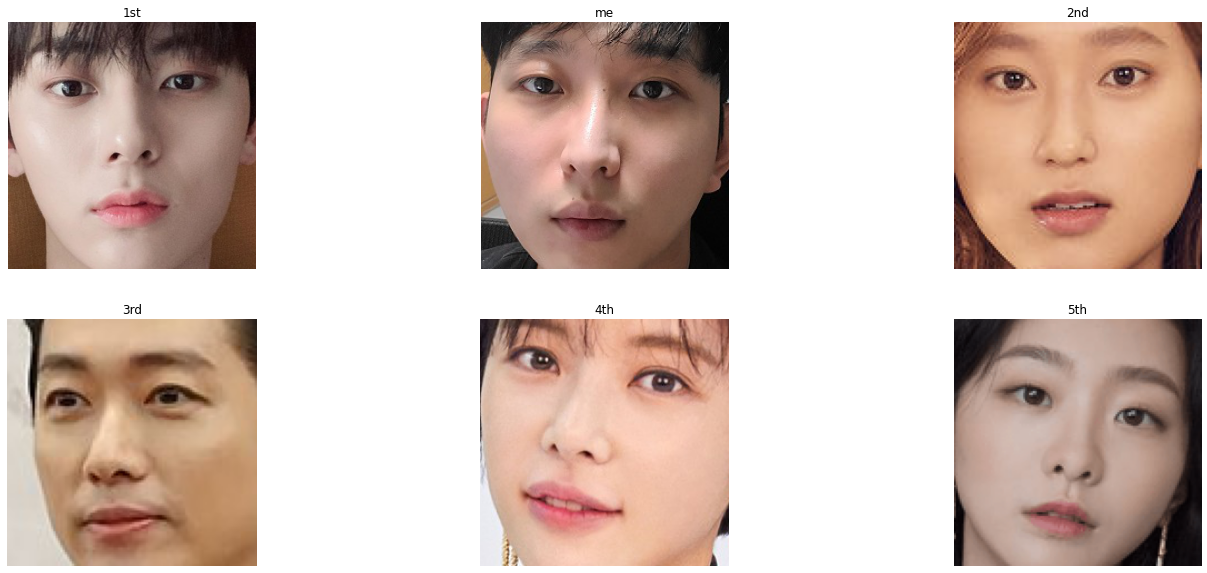

In [26]:
plt.figure(figsize=(24,10))

plt.subplot(231)
plt.imshow(b4)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a4)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b1)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)
plt.imshow(b2)
plt.axis('off')
plt.title('3rd')
plt.subplot(235)
plt.imshow(b15)
plt.axis('off')
plt.title('4th')
plt.subplot(236)
plt.imshow(b8)
plt.axis('off')
plt.title('5th')

print('''selfimg4의 순위
순위 1 : 이름(황민현), 거리(0.3827676253461797)
순위 2 : 이름(류혜영), 거리(0.3906738274572179)
순위 3 : 이름(남궁민), 거리(0.3985395954878331)
순위 4 : 이름(황정음), 거리(0.40456272273832145)
순위 5 : 이름(김다미), 거리(0.41216707117510537)''')

selfimg5의 순위
순위 1 : 이름(손예진), 거리(0.4183885807222977)
순위 2 : 이름(디오), 거리(0.42102093363601084)
순위 3 : 이름(김다미), 거리(0.42310112368232894)
순위 4 : 이름(박민영), 거리(0.42520007107590563)
순위 5 : 이름(박형식), 거리(0.4380638753987138)


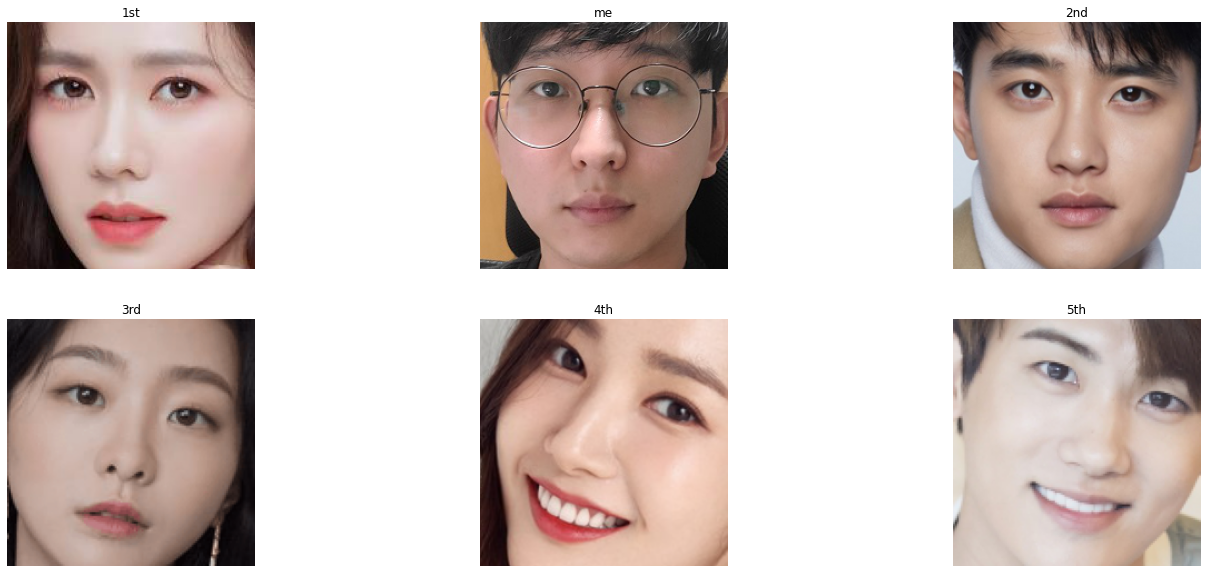

In [27]:
plt.figure(figsize=(24,10))

plt.subplot(231)
plt.imshow(b11)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a5)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b12)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)
plt.imshow(b8)
plt.axis('off')
plt.title('3rd')
plt.subplot(235)
plt.imshow(b13)
plt.axis('off')
plt.title('4th')
plt.subplot(236)
plt.imshow(b14)
plt.axis('off')
plt.title('5th')

print('''selfimg5의 순위
순위 1 : 이름(손예진), 거리(0.4183885807222977)
순위 2 : 이름(디오), 거리(0.42102093363601084)
순위 3 : 이름(김다미), 거리(0.42310112368232894)
순위 4 : 이름(박민영), 거리(0.42520007107590563)
순위 5 : 이름(박형식), 거리(0.4380638753987138)''')

### 5.2. 결론

In [28]:
# 중복요소 카운팅하기 try, except 문 사용
count={}
select_lists = ['류혜영', '남궁민', '류준열', '황민현', '백현', '류혜영', '김동완', '서현진', '황민현', '김다미', '서현진', '류혜영', '소진', '남궁민', '아린2', '황민현', '류혜영', '남궁민', '황정음', '김다미', '손예진', '디오', '김다미', '박민영', '박형식']

for i in select_lists:
    try: count[i] += 1
    except: count[i]=1
print(count)

{'류혜영': 4, '남궁민': 3, '류준열': 1, '황민현': 3, '백현': 1, '김동완': 1, '서현진': 2, '김다미': 3, '소진': 1, '아린2': 1, '황정음': 1, '손예진': 1, '디오': 1, '박민영': 1, '박형식': 1}


### 이번 프로젝트를 통해서, 본인의 5장의 셀카 이미지와 닮은 연예인을 출력한 것을 카운팅해 본 결과

**4회 류혜영**

**3회 남궁민, 황민현, 김다미**

**2회 서현진**

**1회 류준열, 백현, 김동완, 소진, 아린2, 황정음, 손예진, 디오, 박민영, 박형식**

이 출력되셨음을 확인 할 수 있었습니다.

이를 통해서, 본인의 얼굴 외의 배경이라는 변수가 본인과 닮은 연예인을 출력하는 과정에서 유의미한 변수가 되지 못한다는 것을 알 수 있었고,
안경의 유무라는 변수는 본인과 닮은 연예인이 많이 달라지는 것을 보아, 사소한 임베딩 벡터의 거리 값 으로도 전혀 다른 결과 값을 도출할 수 있다는 것을 알 수 있었습니다.

## Step 6. 회고 및 마무리

### 6.1. 회고

#### 1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.

*닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었습니까?*

-> 본인의 사진 5장을 가지고 아래와 같은 양식으로 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력하였습니다.

예제) selfimg5의 순위  

순위 1 : 이름(손예진), 거리(0.4183885807222977)  
순위 2 : 이름(디오), 거리(0.42102093363601084)  
순위 3 : 이름(김다미), 거리(0.42310112368232894)  
순위 4 : 이름(박민영), 거리(0.42520007107590563)  
순위 5 : 이름(박형식), 거리(0.4380638753987138)  

#### 2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.

*다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아내었습니까?*

-> 총 129장의 연예인 이미지와 본인의 이미지간의 embedding 벡터의 거리를 구하는 함수를 사용해서  
    본인의 이미지와 연예인의 이미지의 거리를 비교하여서 닮은 꼴의 연예인을 찾아보았습니다.

#### 3. 다양하고 재미있는 결과 시각화를 시도하였다.

*matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였습니까?*

-> 본인의 이미지 5장을 가지고 닮은 꼴의 연예인을 찾아본 뒤 본인의 이미지를 중앙에 두고 1순위부터 5순위의 닮은 연예인 이미지를 시각화해 보았습니다.

### 6.2 마무리

#### 1. 어려웠던 점

- 처음에 일일히 연예인 사진을 모으는 것에서 어려움을 느꼈었는데, 김성연님과 안가영님의 도움으로 연예인 사진 데이터를 수집할 수 있었습니다.

- 하지만, 연예인 사진 데이터를 쥬피터 노트북에 업로드 과정에서 고용량의 데이터를 넣어서 그런지 계속 끊겨서 사진을 모두 업로드 하지 못한 것이 아쉬웠습니다.

- 또한, 본인의 이미지를 가지고 올 때 크기를 리사이즈 해서 가지고 오지 않아 본인의 사진이 인식을 할 수가 없어서 프로젝트를 시작하는 과정에서 어려움을 느꼈습니다. 하지만, 이후 사진을 500 x 500 으로 리사이즈 후 다시 진행을 해 본 결과, 나머지 영역은 원활히 진행이 되는 것을 확인 할 수 있었습니다.

#### 2. 배운 점

- face_recognition 라이브러리를 통해서 전처리 후 여러 시행착오를 거치며 face_embedding을 하는 방법을 익혀보는 시간이었다고 생각합니다.

- 추가적으로 matplotlib 을 통해서 이미지간의 embedding 벡터 거리 차이를 시각화하여 비교하는 방법을 해보면서 matplotlib과 친숙해지는 시간을 가졌습니다.

#### 3. 마무리

- 지금까지 AIFFEL 활동을 하면서 배워온 지식들이 LMS EXPLORATION 을 진행하면서 하나로 융합이 되는 기분을 느끼는 중입니다.